# Refinitiv Academic Article Series:
# Economics and Finance 101:
# Computing Risk Free Rates and Excess Returns ($r_f$) Part 1: From Sovereign Zero-Coupon-Bonds

This article explains what *Net Present Values*, *Face Values*, *Maturities*, *Coupons*, and *risk-free rates* are, how to calculate them mathematically and compute them, and how they are used in *excess returns* using only Zero-Coupon Bonds; other types of bonds are discussed for completeness, but they will only be investigated as such in further articles to come. It is aimed at academics from undergraduate level up, and thus will explain all mathematical notations to ensure that there is no confusion and so that anyone - no matter their expertise on the subject - can follow.

One may find many uses for the methods outlined below. For example: To calculate metrics such as the [Sharpe-Ratio](https://www.investopedia.com/terms/s/sharperatio.asp), one needs first to calculate *excess returns*, that then necessitates the calculation of *risk-free rates of return*.

## Use of Government Bonds in calculating risk-free rates <a class="anchor" id="UseofGovernmentBondsincalculatingriskfreerates"></a>

Only certain banks have access to the primary sovereign bond markets where they may purchase Domestic Sovereign/Government Bonds. There are many such types of bonds. Among others, there are:


- United States (US): US Treasury securities are issued by the US Department of the Treasury and backed by the US government.
    - Fixed principal: A principal is the amount due on a debt. In the case of bonds, it is often referred to as the Face Value. The Face Value of all US Treasury securities is 1000 US Dollars (USD)
        - Treasury‐bills (as known as (a.k.a.): T-bills) have a maturity of less than a year (< 1 yr). These are bonds that do not pay coupons (**Zero-Coupon Bonds**).
        - Treasury‐notes (a.k.a.: T‐notes) have a maturity between 1 and 10 years (1‐10 yrs).
        - Treasury-bonds (a.k.a.: T‐bonds)  have a maturity between 10 and 30 years (10‐30 yrs). It is confusing calling a sub-set of bonds 'T-bonds', but that is their naming conventions. To avoid confusion, I will always refer to them explicitly as Treasury-bonds (or T‐bonds), not just bonds.
    - Inflation‐indexed: TIPS
    - Treasury STRIPS (created by private sector, not the US government)


- United Kingdom: Since 1998, gilts have been issued by the UK Debt Management Office (DMO), an executive agency of the HMT (Her Majesty's  Treasury).
    - Conventional gilts: Short (< 5 yrs), medium (5‐15 yrs), long (> 15 yrs)
    - Inflation‐indexed gilts


- Japan
    - Medium term (2, 3, 4 yrs), long term (10 yrs), super long term (15, 20 yrs)


- Eurozone government bonds


There are several ways to compute risk-free rates based on bonds. In this article, we will focus on T-bills, as US Sovereign Bonds are often deemed the safest (which is a reason why the USD is named the [world's reserve currency](https://www.investopedia.com/articles/forex-currencies/092316/how-us-dollar-became-worlds-reserve-currency.asp#:~:text=Standing%20on%20Its%20Own%20as,accumulated%20reserves%20of%20U.S.%20dollars.)) and T-bills are an example of Zero-Coupon Bonds (as per [the method outlined by the Business Research Plus](https://bizlib247.wordpress.com/2013/01/18/risk-free-rate-and-fama-french-factors/)). From there, a risk-free rate of return can be computed as **[implied by its bond's Yield To Maturity](#1)** and **[based the change in the same bond's market price from  one day to the next](#2)**.

$$ \\ $$
## 1. YTM implied daily risk-free rate <a class="anchor" id="1"></a>

### US Treasury Securities: Generalised <a class="anchor" id="USTreasurySecuritiesGeneralised"></a>

A bond is a debt; a debt with the promise to pay a [Face Value](https://www.investopedia.com/terms/f/facevalue.asp) ($FV$) in $m$ years (m for maturity) in the future as well as [Coupons](https://www.investopedia.com/terms/c/coupon.asp) (summing to $C$ every year) for an amount today. That latter amount paid for the bond may be fair; a fair value for a bond is calculated as its [Net Present Value](https://www.investopedia.com/terms/n/npv.asp) ($NPV$) such that, at time $t$:

$$ NPV_{f_{\text{acf}}, t} = 
    \begin{Bmatrix}
         \frac{FV_t}{\left(1 + f_{\text{acf}} \text{ } YTM_t\right)^\frac{m}{f_{\text{acf}}}} + \sum^{^\frac{m}{f_{\text{acf}}}}_{\tau=1} {\frac{f_{\text{acf}} \text{ } C}{ (1 + f_{\text{acf}} \text{ } YTM_t)^{\tau} }} & \text{if } m \geq f_{\text{acf}} \\
         \\
         \frac{FV_t + m \text{ } C}{\left(1 + \text{ } m \text{ } YTM_t\right)} & \text{if } m < f_{\text{acf}}
     \end{Bmatrix}
$$

where $YTM$ is the annualised [Yield To Maturity](https://www.investopedia.com/terms/y/yieldtomaturity.asp) of the Bond in question and $f_{\text{acf}}$ is the annual [compound](https://www.investopedia.com/terms/c/compounding.asp#:~:text=Compounding%20is%20the%20process%20whereby,called%20%22miracle%20of%20compounding.%22) frequency (such that if we compound cash flows annually, $f_{\text{acf}} = 1$; and if we compound cash flows bi-annually (*i.e.*: twice a year / every 6 months), $f_{\text{acf}} = 0.5$).

#### Annual Coupon Payment Frequency <a class="anchor" id="AnnualCouponPaymentFrequency"></a>
Coupons are paid at a fixed 'annual Coupon payment frequency' ($f_{ac \mathbf{p} f}$). Usually, the following are true:
- $f_{ac \mathbf{p} f} = 0.5$, *i.e.*: Coupon payments are made every 6 months (*i.e.*: semi-annually)
- $f_{\text{acf}}$ is set to the $f_{ac \mathbf{p} f}$ such that $f_{ac \mathbf{p} f} = f_{ac \mathbf{p} f}$
- Thus $f_{acf} = f_{ac \mathbf{p} f} = 0.5$.

#### Sub-Annual Interpolation of YTMs <a class="anchor" id="SubAnnualInterpolationofYTMs"></a>
Note that when using YTM values inter-year (*e.g.*: after 6 month), we then use a fraction of it, i.e.: $f_{\text{acf}} \text{ } YTM$. This is because all YTM values are annualised and - in accounting standards - *sub-annual* interpolation of YTMs are always [linear/arithmetic](https://en.wikipedia.org/wiki/Linear_interpolation#:~:text=In%20mathematics%2C%20linear%20interpolation%20is,set%20of%20known%20data%20points.). It must be remembered - however - that *super-annual* (*i.e.*: more than a year) extrapolation of YTMs are not necessarily linear/arithmetic.

#### Compounding <a class="anchor" id="Compounding"></a>


It follows from the above that if $f_{\text{acf}} = 1$ such that we use an annually compounding accounting method, *annual* extrapolation of YTMs are [geometric](https://www.investopedia.com/articles/investing/071113/breaking-down-geometric-mean.asp).


Since Coupons are most often paid bi-annually, it **is common standard to compound cashflows bi-annually** too when they involve Bonds - [as aforementioned](#AnnualCouponPaymentFrequency). This is done to model a Bond-holding-[agent](https://en.wikipedia.org/wiki/Agent_(economics)) who re-invests Coupon payments as soon as they're received. In this scenario, $f_{acf} = f_{ac \mathbf{p} f} = 0.5$.

#### Discount Factor <a class="anchor" id="DiscountFactor"></a>
It is easy to see that NPVs and YTMs are therefore (inversely) related; if one changes, the other must change too. We may - therefore - equivalently speak about a change in NPV and a change in YTM since the FV (for each sovereign bond [issuer](https://www.investopedia.com/terms/i/issuer.asp)) does not change. The YTM acts as the [discount factor](https://www.investopedia.com/terms/d/discountrate.asp) here; as a matter of fact, we can see that the YTM is the annual growth rate of our NPV that leads it to the FV in the following:

$$ FV_t  = 
    \begin{Bmatrix}
         \left[ NPV_{f_{\text{acf}}, t} - \sum^{^\frac{m}{f_{acf}}}_{\tau=1} {\frac{f_{acf} \text{ } C}{ (1 + f_{\text{acf}} \text{ } YTM_t)^{\tau} }} \right] \text{ } \left(1 + f_{\text{acf}} \text{ } YTM_t\right)^\frac{m}{f_{\text{acf}}} & \text{if } m \geq f_{\text{acf}} \\
         \\
         NPV_{f_{\text{acf}}, t} \text{ } {\left(1 + \text{ } m \text{ } YTM_t\right)} - m \text{ } C & \text{if } m < f_{\text{acf}}
     \end{Bmatrix}
$$

#### Comparability <a class="anchor" id="Comparability"></a>

NPVs of different bonds are not comparable. That is because they account for bonds maturing at different times. Instead, YTMs of different bonds are comparable because they are annualised, therefore they account for different maturities. It is thus preferable to only speak of changes in sovereign bond NPVs in terms of the change in their YTMs; then we can compare them to each other, *e.g.*: in a Yield Curve (that can be seen [here](https://emea1.apps.cp.thomsonreuters.com/web/Explorer/EVzCURVEzFIxOV.aspx?s=0%23USBMK%3D&st=RIC) with Refinitiv credentials):

<img src="/content/dam/devportal/articles/computing-risk-free-rates-and-excess-returns-from-zero-coupon-bonds/yieldcurve.PNG">

#### A Note on Maturities <a class="anchor" id="Maturities"></a>
It happens to be that we can easily formulate NPV (and FV) in the two cases where $m \geq 1$ and $m < 1$  because all maturities greater than 1 are a multiple of 1 (*i.e.*: they are whole numbers) (*i.e.*: no maturities past 1 year stop mid year, *e.g.*: 10 years and 6 months).

### T-bill Example 1: One-month T-Bill <a class="anchor" id="TbillExample1OnemonthTBill"></a>

#### With Annual Compounding <a class="anchor" id="WithAnnualCompounding"></a>

Using an annual compounding accounting method (such that $f_{\text{acf}} = 1$), a T-bill that matures in one month (One-month T-Bill, OMTB) has a Net Present Value of ${NPV}_{\text{OMTB}, f_{\text{acf}}, t}$, more precisely ${NPV}_{\text{OMTB}, 1, t}$, at time t such that:

$$ \begin{array}{ll}
{NPV}_{\text{OMTB}, 1, t} &= 
    \begin{Bmatrix}
         \frac{{FV}_{\text{OMTB}, t}}{({1+{YTM}_{\text{OMTB}, t}})^{m_{\text{OMTB}}}}
         + \sum^{m_{\text{OMTB}}}_{\tau=1} {\frac{C_{\text{OMTB}}}{ (1 + YTM_{{\text{OMTB}},t})^{\tau} }}
         & \text{if } m_{\text{OMTB}} \geq 1 \\
         \\
         \frac{{FV}_{\text{OMTB}, t} + m_{\text{OMTB}} \text{ } C_{\text{OMTB}} }{{1+ \text{ } m_{\text{OMTB}} \text{ } {YTM}_{\text{OMTB}, t}}} & \text{if } m_{\text{OMTB}} < 1
     \end{Bmatrix} \\
     \\
&= \frac{1000 \text{ U.S.D.}}{{1+\frac{1}{12} {YTM}_{\text{OMTB}, t}}}
\end{array}$$

since no Coupons are paid for T-Bills as [aformentioned](#UseofGovernmentBondsincalculatingriskfreerates) (*i.e.*: $C_{\text{OMTB}} = 0$), $m_{\text{OMTB}} = \frac{1}{12} < 1$ and ${FV}_{\text{OMTB}, t} = $ 1000 U.S.D.; **all US bonds have a $FV$ of 1000 U.S.D.**. Let us use the $YTM_{OMTB}$ for the 13$^\text{rd}$ of July 2020 (2020-07-13) quoted on Datastream under [TRUS1MT](http://product.datastream.com/browse/search.aspx?dsid=ZRQW955&AppGroup=DSAddin&q=Refinitiv+United+States+Government+Benchmark+Bid+Yield+1+Month&prev=99_Refinitiv+United+States+Government+Benchmark+Bid+Yield+3+Months&nav_category=8): 0.112 U.S.D.. It is quoted in U.S.D. because it was normalised for every U.S.D..

In [1]:
# We need to gather our data. Since Refinitiv's DataStream Web Services (DSWS) allows for access to the most accurate and wholesome end-of-day (E.O.D.) economic database (DB), naturally it is more than appropriate. We can access DSWS via the Python library "DatastreamDSWS" that can be installed simply by using  pip install .
import DatastreamDSWS as DSWS

## We can use our Refinitiv's Datastream Web Socket (DSWS) API keys that allows us to be identified by Refinitiv's back-end services and enables us to request (and fetch) data:

# The username is placed in a text file so that it may be used in this code without showing it itself:
DSWS_username = open("Datastream_username.txt","r")
# Same for the password:
DSWS_password = open("Datastream_password.txt","r")

ds = DSWS.Datastream(username=str(DSWS_username.read()), password=str(DSWS_password.read()))

# It is best to close the files we opened in order to make sure that we don't stop any other services/programs from accessing them if they need to:
DSWS_username.close()
DSWS_password.close()

In [2]:
# Now get the data we were looking for. Note that 'TRUS1MT' is in percent, so we divide by 100 to get a ratio.
TRUS1MT_2020_07_13 = ds.get_data(tickers='TRUS1MT', start='2020-07-13',
                                 end='2020-07-17', fields="X", freq='D')/100
TRUS1MT_2020_07_13.loc["2020-07-13"]

Instrument  Field
TRUS1MT     X        0.00112
Name: 2020-07-13, dtype: float64

This gives a YTM of 0.00112 (*i.e.*: 0.112%). Then:

$$ \begin{array}{ll}
{NPV}_{\text{OMTB}, t} &= \frac{1000 \text{ U.S.D.}}{{1+\frac{1}{12} {YTM}_{\text{OMTB}, t}}} \\
& = \frac{1000 \text{ U.S.D.}}{{1+\frac{1}{12} 0.00112}} \\
& \approx 999.906675 \text{ U.S.D.}
\end{array}$$

since:

In [3]:
1000 / (1 + (1/12) * 0.00112)

999.9066753769649

#### With Semi-Annual Compounding <a class="anchor" id="WithSemiAnnualCompounding"></a>

This section is purposefully added to this article to express the fact that $NPV_{\text{OMTB}}$ is the same with annual and semi-annual compounding; *i.e.*: ${NPV}_{\text{OMTB}, 1, t} = {NPV}_{\text{OMTB}, 0.5, t}$. With semi-annual compounding, $f_{\text{acf}} = 0.5$ such that:

$$  \begin{array}{ll}
{NPV}_{\text{OMTB}, 0.5, t} &= 
    \begin{Bmatrix}
         \frac{FV_{\text{OMTB}, t}}{\left(1 + 0.5 YTM_{\text{OMTB}, t}\right)^\frac{m_{\text{OMTB}}}{0.5}} + \sum^{^\frac{m_{\text{OMTB}}}{0.5}}_{\tau=1} {\frac{0.5 \text{ } C_{\text{OMTB}}}{ (1 + 0.5 \text{ } YTM_{\text{OMTB}, t})^{\tau} }} & \text{if } m_{\text{OMTB}} \geq 0.5 \\
         \\
         \frac{FV_{\text{OMTB}, t} + m_{\text{OMTB}} \text{ } C_{\text{OMTB}} }{\left(1 + \text{ } m_{\text{OMTB}} \text{ } YTM_{\text{OMTB}, t}\right)} & \text{if } m_{\text{OMTB}} < 0.5
     \end{Bmatrix}\\
     \\
&= \frac{1000 \text{ U.S.D.}}{{1+\frac{1}{12} {YTM}_{\text{OMTB}, t}}} & \text{since  } m_{\text{OMTB}} = \frac{1}{12} < 0.5 \text{ and } C_{\text{OMTB}} = 0  \text{ and } {FV}_{\text{OMTB}, t} = 1000 \text{ U.S.D.}\\
&= \frac{1000 \text{ U.S.D.}}{{1+\frac{0.00112}{12} }} & \text{when $t$ represents "2020-07-13" thus using } YTM_{\text{OMTB}, "2020-07-13" } = 0.00112\\
&\approx 999.9066753769649
\end{array}$$

since

In [4]:
1000 / (1+ (0.00112/12))

999.9066753769649

We can see now that what matters is if $m < f_{\text{acf}}$. This far, this has indeed been the case and $f_{\text{acf}}$ was high; but what if it wasn't? This is what we explore next. Note that sovereign bonds with maturities higher than 6 months tend to pay coupons, and this is beyond the scope of this article; for this, read 'Refinitiv Academic Article Series: Economics and Finance 101: Computing Risk Free Rates and Excess Returns from Sovereign Coupon Paying Bonds'.

#### With Semi-Montly Compounding <a class="anchor" id="WithSemiMontlyCompounding"></a>

With semi-monthly compounding, $f_{\text{acf}} = \frac{1}{24}$ such that:

$$  \begin{array}{ll}
{NPV}_{\text{OMTB}, \frac{1}{24}, t} &= 
    \begin{Bmatrix}
         \frac{FV_{\text{OMTB}, t}}{\left(1 + \frac{1}{24} YTM_{\text{OMTB}, t}\right)^\frac{m_{\text{OMTB}}}{\frac{1}{24}}} + \sum^{^\frac{m_{\text{OMTB}}}{\frac{1}{24}}}_{\tau=1} {\frac{\frac{1}{24} \text{ } C_{\text{OMTB}}}{ (1 + \frac{1}{24} \text{ } YTM_{\text{OMTB}, t})^{\tau} }} & \text{if } m_{\text{OMTB}} \geq \frac{1}{24} \\
         \\
         \frac{FV_{\text{OMTB}, t} + m_{\text{OMTB}} \text{ } C_{\text{OMTB}} }{\left(1 + \text{ } m_{\text{OMTB}} \text{ } YTM_{\text{OMTB}, t}\right)} & \text{if } m_{\text{OMTB}} < \frac{1}{24}
     \end{Bmatrix}\\
     \\
&= \frac{{FV}_{\text{OMTB}, t}}{\left(1 + \frac{1}{24} YTM_{\text{OMTB}, t}\right)^\frac{\frac{1}{12}}{\frac{1}{24}}}  & \text{since  } m_{\text{OMTB}} = \frac{1}{12} \geq \frac{1}{24} = f_{\text{acf}} \text{ and } C_{\text{OMTB}} = 0\\
&= \frac{1000 \text{ U.S.D.}}{\left(1 + \frac{1}{24} YTM_{\text{OMTB}, t}\right)^2}  & \text{since } \frac{\frac{1}{12}}{\frac{1}{24}} = 2 \text{ and } {FV}_{\text{OMTB}, t} = 1000 \text{ U.S.D.} \\
&= \frac{1000 \text{ U.S.D.}}{\left(1 + \frac{0.00112}{24}\right)^2} & \text{when $t$ represents "2020-07-13" thus using } YTM_{\text{OMTB}, "2020-07-13"} = 0.00112\\
&\approx 999.9066731995933
\end{array}$$

since

In [5]:
1000 / ((1+ (0.00112/24))**2)

999.9066731995933

As predicted, ${NPV}_{\text{OMTB}, \frac{1}{24}, "2020-07-13"} = {NPV}_{\text{OMTB}, 0.25, "2020-07-13"} \approx 999.9066731995933 < 999.9066753769649 \approx {NPV}_{\text{OMTB}, 0.5, "2020-07-13"} $, meaning that an investor would pay less for a Bond if (s)he compounds at a shorter interval; similarly, (s)he requires a higher Yield.

### T-bill Example 2: Three-Month T-Bill with Monthly Compounding <a class="anchor" id="TbillExample2ThreeMonthTBillwithMonthlyCompounding"></a>

With monthly compounding, $f_{\text{acf}} = \frac{1}{12}$. With a Three-Month T-Bill (TMTB), we use $m_{\text{TMTB}} = \frac{1}{4}$ such that:

$$  \begin{array}{ll}
{NPV}_{\text{TMTB}, \frac{1}{12}, t} &= 
    \begin{Bmatrix}
         \frac{FV_{\text{TMTB}, t}}{\left(1 + \frac{1}{12} YTM_{\text{TMTB}, t}\right)^\frac{m_{\text{TMTB}}}{\frac{1}{12}}} + \sum^{^\frac{m_{\text{TMTB}}}{\frac{1}{12}}}_{\tau=1} {\frac{\frac{1}{12} \text{ } C_{\text{TMTB}}}{ (1 + \frac{1}{12} \text{ } YTM_{\text{TMTB}, t})^{\tau} }} & \text{if } m_{\text{TMTB}} \geq \frac{1}{12} \\
         \\
         \frac{FV_{\text{TMTB}, t} + m_{\text{TMTB}} \text{ } C_{\text{TMTB}} }{\left(1 + \text{ } m_{\text{TMTB}} \text{ } YTM_{\text{TMTB}, t}\right)} & \text{if } m_{\text{TMTB}} < \frac{1}{12}
     \end{Bmatrix}\\
     \\
&= \frac{FV_{\text{TMTB}, t}}{\left(1 + \frac{1}{12} YTM_{\text{TMTB}, t}\right)^\frac{\frac{1}{4}}{\frac{1}{12}}} + \sum^{^\frac{\frac{1}{4}}{\frac{1}{12}}}_{\tau=1} {\frac{\frac{1}{12} \text{ } C_{\text{TMTB}}}{ (1 + \frac{1}{12} \text{ } YTM_{\text{TMTB}, t})^{\tau} }} & \text{since } m_{\text{TMTB}} = \frac{1}{4} \geq \frac{1}{12} = f_{\text{acf}} \\
&= \frac{FV_{\text{TMTB}, t}}{\left(1 + \frac{1}{12} YTM_{\text{TMTB}, t}\right)^3} + \sum^3_{\tau=1} {\frac{\frac{1}{12} \text{ } C_{\text{TMTB}}}{ (1 + \frac{1}{12} \text{ } YTM_{\text{TMTB}, t})^{\tau} }} & \text{since } \frac{\frac{1}{4}}{\frac{1}{12}} = 3 \\
&= \frac{1000 \text{ U.S.D.}}{\left(1 + \frac{1}{12} YTM_{\text{TMTB}, t}\right)^3} + \sum^3_{\tau=1} {\frac{\frac{1}{12} \text{ } C_{\text{TMTB}}}{ (1 + \frac{1}{12} \text{ } YTM_{\text{TMTB}, t})^{\tau} }} & \text{since } {FV}_{\text{TMTB}} = 1000 \text{ U.S.D.} \\
&= \frac{1000 \text{ U.S.D.}}{\left(1 + \frac{1}{12} YTM_{\text{TMTB}, t}\right)^3} & \text{since } C_{\text{TMTB}} = 0
\end{array}$$

When using the Yield To Maturity of our TMTB as of 2020-07-13, *i.e.*: 0.00137 since

In [6]:
# Now get the data we were looking for. Note that 'TRUS3MT' is in percent, so we divide by 100 to get a ratio.
TRUS3MT_2020_07_13 = ds.get_data(tickers='TRUS3MT', fields="X",
                                 start='2020-07-13', end='2020-07-17', freq='D')/100
TRUS3MT_2020_07_13.loc["2020-07-13"]

Instrument  Field
TRUS3MT     X        0.00137
Name: 2020-07-13, dtype: float64

Then:

$${NPV}_{\text{TMTB}, \frac{1}{12}, "2020-07-13"} = \frac{1000 \text{ U.S.D.}}{\left(1 + \frac{1}{12} 0.00137 \right)^3} \approx 999.6575781892886$$

since

In [7]:
1000 / ((1 + (1/12)*0.00137)**3)

999.6575781892886

### Risk-free rate of a One-Month T-Bill <a class="anchor" id="RiskfreerateofaOneMonthTBill"></a>

If an investor buys a One-month T-Bill for 900 U.S.D. at the start of a 30 day month, it will mature with a Face Value of 1000 U.S.D., and the investor would have made $1000 - 900 = 100$ U.S.D. in profit. Over that 30 days, that's a straight-line / arithmetic return rate of $\frac{1000 - 900}{900} = 0.\dot{1}$ (note that the [dot on top of $1$ in $0.\dot{1}$ is the standard notation of a recurring decimal](https://en.wikipedia.org/wiki/Repeating_decimal)) , *i.e.*: approximately 11.11%, since:

In [8]:
(1000 - 900)/900

0.1111111111111111

That - itself - is a straight-line / arithmetic daily return rate of $\frac{0.\dot{1}}{30} = 0.0\dot{0}3\dot{7} \approx 0.37 \%$ since:

In [9]:
((1000 - 900)/900)/30

0.0037037037037037034

(S)He **theoretically** gets that return every day (theoretically since it doesn't realise until the bond matures, *i.e.*: until the end of the Bond).

**But** investors are in the habit of re-investing their returns to benefit from [compounding](https://www.investopedia.com/terms/c/compounding.asp). This way we are not looking at straight-line / arithmetic interests, but [geometric](https://en.wikipedia.org/wiki/Exponential_growth) interest. The geometric daily interest of our investor is

$$\sqrt[30]{1 + \frac{1000 - 900}{900}} - 1 = \left( 1 + \frac{1000 - 900}{900} \right)^{\frac{1}{30}} - 1 \approx 0.0035181915469957303 \approx 0.35 \%$$

since:

In [10]:
((1 + ((1000-900)/900)))**(1/30) - 1

0.0035181915469957303

(note that the ${\frac{1}{n}}^{th}$ exponent of a value is its $n^{th}$ root; this is a concept that is imperative to comprehend to understand the coding we go through below) meaning that (s)he gets approximately $900 * 0.0035 = 3.15$ USD the first day, then $(900 + 3.15) * 0.0035 \approx 3.16$ USD the next day, and so on.

$$ \\ $$

Following the same logic, it is easy to calculate the risk-free rate ($r_f$) on any frequency. The compounding $r_f$ of our 1-Month T-Bill for any number of periods in a year (say, daily, *i.e.*: $d$) with a yield ${YTM}_{\text{OMTB}, t}$ is such that:

$$\mathbf{r_f = \sqrt[d]{1 + {YTM}_{\text{OMTB}, t}} - 1}$$

It is this simple because YTMs are annualised. *E.g.*: for a year with 252 trading days where ${YTM}_{\text{OMTB}, t} = 0.00091$ : $$r_f = \sqrt[252]{1 + 0.00091} - 1 \approx 0.0000036094755657689603 \approx 0.0004 \%$$ since:

In [11]:
(1.00091**(1/252))-1

3.6094755657689603e-06

This is the **YTM implied daily risk-free rate** ($r_f$) of our bond. A similar 'weekly' - 7 day - or 'monthly' - 30 day - rate can be made by letting $d$ be the number of weeks or months for the year in question.

Why would one use 30 days (as per our example)? Because the 1-, 2-, and 3-month rates are equivalent to the 30-, 60-, and 90-day dates respectively, reported on [the Board's Commercial Paper Web page](www.federalreserve.gov/releases/cp/). This is as per reference (see more [here](https://fred.stlouisfed.org/series/DGS1MO#0) and [here](https://www.federalreserve.gov/releases/h15/current/h15.pdf)) with that said, one ought to use the exact number of days to maturity.

Note - however - that we only looked at Zero-Coupon Bonds. If $m > 1$, then Coupons usually have to be taken into account.

We may now code a Python function to go through this method:

$$ \\ $$
### Getting to the Coding <a class="anchor" id="GettingtotheCoding"></a>

#### Development Tools & Resources <a class="anchor" id="DevelopmentToolsandResources"></a>
The example code demonstrating the use case is based on the following development tools and resources:

- Refinitiv's [DataStream](https://www.refinitiv.com/en/products/datastream-macroeconomic-analysis) Web Services (DSWS): Access to DataStream data. A DataStream or Refinitiv Workspace IDentification (ID) will be needed to run the code below.
- Python Environment:
Tested with Python 3.7

#### Import Libraries <a class="anchor" id="ImportLibraries"></a>

In [12]:
# The ' from ... import ' structure here allows us to only import the
# module ' python_version ' from the library ' platform ':
from platform import python_version
print("This code runs on Python version " + python_version())

This code runs on Python version 3.8.2


$$ \\ $$
We need to gather our data. Since **Refinitiv's [DataStream](https://www.refinitiv.com/en/products/datastream-macroeconomic-analysis) Web Services (DSWS)** allows for access to the most accurate and wholesome end-of-day (E.O.D.) economic database (DB), naturally it is more than appropriate. We can access DSWS via the Python library "DatastreamDSWS" that can be installed simply by using $\textit{pip install}$.

In [13]:
# We need to gather our data. Since Refinitiv's DataStream Web Services (DSWS) allows for access to the most accurate and wholesome end-of-day (E.O.D.) economic database (DB), naturally it is more than appropriate. We can access DSWS via the Python library "DatastreamDSWS" that can be installed simply by using  pip install.
import DatastreamDSWS as DSWS

# We can use our Refinitiv's Datastream Web Socket (DSWS) API keys that allows us to be identified by Refinitiv's back-end services and enables us to request (and fetch) data:

# The username is placed in a text file so that it may be used in this code without showing it itself:
DSWS_username = open("Datastream_username.txt", "r")
# Same for the password:
DSWS_password = open("Datastream_password.txt", "r")

ds = DSWS.Datastream(username=str(DSWS_username.read()),
                     password=str(DSWS_password.read()))

# It is best to close the files we opened in order to make sure that we don't stop any other services/programs from accessing them if they need to:
DSWS_username.close()
DSWS_password.close()

$$ \\ $$
pandas will be needed to manipulate data sets

In [14]:
import pandas
pandas.set_option('display.max_columns', None) # This line will ensure that all columns of our dataframes are always shown

$$ \\ $$
The below are needed to plot graphs of all kinds

In [15]:
import plotly
import plotly.express
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

import cufflinks
cufflinks.go_offline()
# cufflinks.set_config_file(offline = True, world_readable = True)

In [16]:
for i,j in zip(["plotly", "cufflinks", "pandas"], [plotly, cufflinks, pandas]):
    print("The " + str(i) + " library imported in this code is version: " + j.__version__)

The plotly library imported in this code is version: 4.14.3
The cufflinks library imported in this code is version: 0.17.3
The pandas library imported in this code is version: 1.2.4


### Create a function to compute the risk-free rate of return for any Zero-Coupon Bond's Yield To Maturity gathered from [Datastream](https://www.refinitiv.com/en/products/datastream-macroeconomic-analysis) <a class="anchor" id="CreateafunctiontocomputetheriskfreerateofreturnforanyZeroCouponBondsYieldToMaturitygatheredfromDatastream"></a>

remember, our formula is: $${r_{f,t}} = \sqrt[d]{1 + {YTM}_{\text{OMTB}, t}} - 1$$ where $t \in \mathbb{Z}$ and $ 1 \le t \ge T$. We define the (time) vector

$$
\mathbf{r\_f} = 
\left[ \begin{matrix}
    r_{{f},1} \\
    r_{{f},2} \\
    \vdots\\
    r_{{f},T}
\end{matrix} \right]
$$

This Python function will return the Zero-Coupon Bond's YTM Implied Risk Free Interest Rate, thus its name 'ZCB_YTM_Implied_r_f':

In [17]:
def ZCB_YTM_Implied_r_f(ytm, d):
    """ ZCB_YTM_Implied_r_f Version 2.0: This Python function returns the Zero-Coupn Bond (ZCB) Yield To Maturity (YTM) Implied Risk Free Interest Rate, thus its name 'ZCB_YTM_Implied_r_f'

    ytm (Datastream pandas dataframe): The Yield To Maturity of the Zero-Coupon Bond in question.
    It requiers the DSWS library from Refinitiv.
    E.g.: ytm = ds.get_data(tickers = 'TRUS1MT', fields = "X", start = '1950-01-01', freq = 'D')/100

    d (int): The number of time periods (e.g.: days) until the bond matures
    N.B.: The 1-, 2-, and 3-month rates are equivalent to 30-, 60-, and 90-day dates respectively, as reported on the Board's Commercial Paper Web page.
    E.g.: d = 30

    #########
    Update: From Version 1.0 to 2.0:
    Variables were renames with lower case characters, staying consistant with pycodestyle.
    """

    # Rename the columns of 'ytm' correctly:
    instrument_name = ytm.columns[0][0]
    arrays = [[instrument_name], ['YTM']]
    tuples = list(zip(*arrays))
    ytm.columns = pandas.MultiIndex.from_tuples(tuples,
                                                names=['Instrument', 'Field'])

    # Calculate the r_f
    r_f = ((ytm + 1)**(1/d))-1

    # Rename the columns of r_f correctly:
    instrument_name = ytm.columns[0][0]
    arrays = [[instrument_name], ['YTM_Implied_r_f']]
    tuples = list(zip(*arrays))
    r_f.columns = pandas.MultiIndex.from_tuples(tuples,
                                                names=['Instrument', 'Field'])

    # return a list including r_f 0th and ytm 1st.
    return(r_f, ytm)

Let's test the Python function with One-Month U.S. T.Bill:

In [18]:
test1m = ZCB_YTM_Implied_r_f(
    ytm=ds.get_data(tickers='TRUS1MT', fields="X",
                    start='1950-01-01', end='2020-07-22', freq='D')/100,
    d=30)

In [19]:
test1m[0].dropna()

Instrument,TRUS1MT
Field,YTM_Implied_r_f
Dates,
2001-07-31,0.001183
2001-08-01,0.001180
2001-08-02,0.001180
2001-08-03,0.001173
2001-08-06,0.001173
...,...
2020-07-16,0.000038
2020-07-17,0.000037


In [20]:
test1m[0].dropna().loc["2019-12-31"]*100

Instrument  Field          
TRUS1MT     YTM_Implied_r_f    0.048918
Name: 2019-12-31, dtype: float64

In [21]:
test1m[1].dropna()

Instrument,TRUS1MT
Field,YTM
Dates,
2001-07-31,0.03610
2001-08-01,0.03600
2001-08-02,0.03600
2001-08-03,0.03580
2001-08-06,0.03580
...,...
2020-07-16,0.00114
2020-07-17,0.00112


## 2. Risk-free rate based the change in the same bond's market value from one time period (e.g.: day) to the next <a class="anchor" id="2"></a>

This method of computing risk-free returns is more academic and less practical. You can think of it as '[Dirty Pricing](https://www.investopedia.com/articles/investing/051315/present-value-different-bond-types-using-excel.asp)' in a way. With that said, the notion of a risk-free return itself is theoretical, going further, the notion of a risk-free asset such as a risk-free government bond is also theoretical; it is always possible for the guarantor of the payment of the bond's Face Value at maturity to default and not make do on its promises.

Now we may compute a theoretical risk-free daily return value based on the difference in the price of the risk-free asset from one period (say day) to the next (for every unit currency invested); note that this may result in negative $r_f$ values:

- 1st: As aforementioned, 
the 1-, 2-, and 3-month rates are equivalent to the 30-, 60-,
and 90-day dates respectively, reported on [the Board's Commercial Paper Web
page](www.federalreserve.gov/releases/cp/). This is as per reference (see more and [here](https://www.federalreserve.gov/releases/h15/current/h15.pdf)).
Figures [are annualized using a 360-day year or bank interest](https://www.federalreserve.gov/releases/h15/).
We are using Refinitiv's Datastream YTM in percent data.

- 2nd: From there,
we workout below the unit return from holding a one-month Treasury Bill over
the period from t-1 to t by calculating its difference in daily value
where: 
$$ {NPV}_{\text{OMTB}, t} = \frac{{FV}_{\text{OMTB}, t}}{{1+ \text{ } m_{\text{OMTB}} \text{ } {YTM}_{\text{OMTB}, t}}} = \frac{1000 \text{ U.S.D.}}{{1+\frac{1}{12} {YTM}_{\text{OMTB}, t}}}$$
since ${FV}_{\text{OMTB}, t} = $ 1000 U.S.D., we are dealing with a zero-Coupon-Bond (*i.e.*: $C_{\text{OMTB} = 0}$), we are using the (conventional) semi-annual compounding accounting method (*i.e.*: $f_{\text{acpf}} = f_{\text{acf}} = 0.5$) and $m_{\text{OMTB}} = \frac{1}{12} < 0.5$ and. For YTM data from Datastream we can go for 1-Month yields ([TRUS1MT](http://product.datastream.com/browse/search.aspx?dsid=ZRQW955&AppGroup=DSAddin&q=Refinitiv+United+States+Government+Benchmark+Bid+Yield+1+Month&prev=99_Refinitiv+United+States+Government+Benchmark+Bid+Yield+3+Months&nav_category=8)) as above, or 3-Month yields ([TRUS3MT](http://product.datastream.com/browse/search.aspx?dsid=ZRQW955&AppGroup=DSAddin&q=Refinitiv+United+States+Government+Benchmark+Bid+Yield+3+Months&prev=99_DTB3%3A+Refinitiv+United+States+Government+Benchmark+Bid+Yield+3+Months&nav_category=8)).

We may thus define, for a 1-Month T-Bill:
$$ \begin{array}{ll}
r_{{f},t} &= \frac{{NPV}_{\text{OMTB}, t} - {NPV}_{\text{OMTB}, t-1}}{{NPV}_{\text{OMTB}, t-1}} \\
&= \frac{\frac{1000 \text{ U.S.D.}}{{1+\frac{1}{12} {YTM}_{\text{OMTB}, t}}} - \frac{1000 \text{ U.S.D.}}{{1+\frac{1}{12} {YTM}_{\text{OMTB}, t-1}}}}{\frac{1000 \text{ U.S.D.}}{{1+\frac{1}{12} {YTM}_{\text{OMTB}, t-1}}}}
\end{array}$$
where $t \in \mathbb{Z}$ and $ 1 \le t \ge T$. We define the (time) vector

$$
\mathbf{r\_f} = 
\left[ \begin{matrix}
    r_{{f},1} \\
    r_{{f},2} \\
    \vdots\\
    r_{{f},T}
\end{matrix} \right]
$$

### Create a function to compute the risk-free rate of return for any Zero-Coupon Bond's Market Value gathered from Datastream: <a class="anchor" id="CreateafunctiontocomputetheriskfreerateofreturnforanyZeroCouponBondsMarketValuegatheredfromDatastream"></a>

This Python function will return the Zero-Coupon Bond's Value Implied Risk Free Interest Rate, thus its name 'ZCB_Value_Implied_r_f':

In [22]:
def ZCB_Value_Implied_r_f(ytm, maturity, face_value=1000.0):
    """ ZCB_Value_Implied_r_f Python Function Version 2.0: This Python function returns the Zero-Coupon Bond's Value Implied Risk Free Interest Rate, thus its name 'ZCB_Value_Implied_r_f'

    face_value (float): The payment promised by the issuer of the Zero-coupon Bond at the bond's maturity-time.
    Defaulted to: face_value = 1000.0

    ytm (Datastream pandas dataframe): The Yield To Maturity of the Zero-Coupon Bond in question.
    It requires the DSWS library from Refinitiv.
    E.g.: ytm = ds.get_data(tickers = 'TRUS1MT', fields = "X", start = '1950-01-01', freq = 'D')/100

    maturity (float): The number of years until the bond matures.
    This can be lower than 1, e.g.: One-Month Zero-Coupon T.Bill would have a 'maturity' value of 1/12.
    E.g.: maturity = 1/12

    #########
    Update: From Version 1.0 to 2.0:
    Variables were renames with lower case characters, staying consistant with pycodestyle.
    """

    # Calculate the ytm
    npv = face_value/(1 + maturity * ytm)

    # Rename the columns of 'V' correctly:
    instrument_name = npv.columns[0][0]
    arrays = [[instrument_name], ['Net Present Value']]
    tuples = list(zip(*arrays))
    npv.columns = pandas.MultiIndex.from_tuples(tuples, names=['Instrument',
                                                               'Field'])

    # Calculate the r_f
    r_f = (npv - npv.shift(periods=1))/npv.shift(periods=1)

    # Rename the columns of r_f correctly:
    instrument_name = npv.columns[0][0]
    arrays = [[instrument_name], ['Value_Implied_r_f']]
    tuples = list(zip(*arrays))
    r_f.columns = pandas.MultiIndex.from_tuples(tuples, names=['Instrument',
                                                               'Field'])

    # return a list including r_f 0th and YTM 1st.
    return(r_f, npv)

Let's test the Python function with One-Month U.S. T.Bill:

In [23]:
test2 = ZCB_Value_Implied_r_f(
    face_value=1000.0,
    ytm=ds.get_data(tickers='TRUS1MT',
                    fields="X",
                    start='1950-01-01',
                    freq='D')/100,
    maturity=1/12)

In [24]:
test2[0].dropna()

Instrument,TRUS1MT
Field,Value_Implied_r_f
Dates,
2001-08-01,0.000008
2001-08-02,0.000000
2001-08-03,0.000017
2001-08-06,0.000000
2001-08-07,0.000008
...,...
2021-06-09,0.000002
2021-06-10,0.000000


In [25]:
test2[1].dropna()

Instrument,TRUS1MT
Field,Net Present Value
Dates,
2001-07-31,997.000690
2001-08-01,997.008973
2001-08-02,997.008973
2001-08-03,997.025540
2001-08-06,997.025540
...,...
2021-06-09,999.995833
2021-06-10,999.995833


## Excess Returns $R_t$ <a class="anchor" id="ExcessReturns"></a>

Now that we have risk-free rates, it is easy to compute the excess return of any instrument.

The excess returns ($XSR_{t}$) at time t are computed from its price ($P_{t}$) and the chosen risk free rate (${r_f}_t$) such that:

$$\begin{equation}
    XSR_{t} = \frac{P_{t} - P_{t-1}}{P_{t-1}} - {r_f}_t
\end{equation}$$

Note here that: Due to the differencing necessary to calculate 'XSR', the first value is empty.

We define the (time) vector
$$ \mathbf{XSR}
=
\left[ \begin{matrix}
    XSR_{1} \\
    XSR_{2} \\
    \vdots\\
    XSR_{T}
\end{matrix} \right]
$$
where $t \in \mathbb{Z}$ and $ 1 \le t \ge T$. $\mathbf{R}$ is thus as defined in the cell below.

**Example: The S&P500 index**: With the 1-Month U.S. T.Bill:

In [26]:
P_SPX = ds.get_data(tickers='S&PCOMP',
                    fields="X",
                    start='1950-01-01',
                    freq='D')

r_f = ZCB_YTM_Implied_r_f(
    ytm=ds.get_data(tickers='TRUS1MT',
                    fields="X",
                    start='1950-01-01',
                    freq='D')/100,
    d=30*3)[0]

# r_f and P_SPX must have the same column names to go through some algebra between one-another.
# We thus rename the columns of r_f correctly:
arrays = [["S&PCOMP"], ['X']]
tuples = list(zip(*arrays))
r_f.columns = pandas.MultiIndex.from_tuples(
    tuples,
    names=['Instrument', 'Field'])

XSR_SPX = ((P_SPX - P_SPX.shift(periods=1))/P_SPX.shift(periods=1)) - r_f

# We now rename the columns of R_SPX correctly:
instrument_name = P_SPX.columns[0][0]
arrays = [[instrument_name], ['Excess Returns']]
tuples = list(zip(*arrays))
XSR_SPX.columns = pandas.MultiIndex.from_tuples(
    tuples,
    names=['Instrument', 'Field'])

In [27]:
r_f.dropna()

Instrument,S&PCOMP
Field,X
Dates,
2001-07-31,3.941184e-04
2001-08-01,3.930455e-04
2001-08-02,3.930455e-04
2001-08-03,3.908994e-04
2001-08-06,3.908994e-04
...,...
2021-06-09,5.555418e-07
2021-06-10,5.555418e-07


In [28]:
XSR_SPX.dropna()

Instrument,S&PCOMP
Field,Excess Returns
Dates,
2001-07-31,0.005177
2001-08-01,0.003487
2001-08-02,0.003571
2001-08-03,-0.005634
2001-08-06,-0.011813
...,...
2021-06-09,-0.001824
2021-06-10,0.004652


We can create a function that goes through this: Excess Returns being abridged to 'XSReturns'

In [29]:
def XSReturns(p, r_f):
    """ XSReturns Python Class Version 2.0: This function returns the Excess Return of any one instrument with the price 'p' collected from Datastream and any 
    risk-free return computed with the function 'YTM_Implied_r_f' that collects data from Datastream.

    p (pandas data-frame): The price of the Instrument in mind with 2 column name rows: one for the Instrument name and the other for the field name.
    E.g.: p = ds.get_data(tickers = 'S&PCOMP', fields = "X", start = '1950-01-01', freq = 'D')

    r_f (pandas data-frame): The risk-free rate of return with 2 column name rows: one for the Instrument
                            (the Zero Coupon Bond chosen to compute r_f from) name and the other for the field name.
    E.g.: r_f = ZCB_YTM_Implied_r_f(YTM = ds.get_data(tickers = 'TRUS3MT', fields = "X", start = '1950-01-01', freq = 'D')/100,
                                    maturity = 3/12,
                                    D = 30 * 3)[0]
    #########
    Update: From Version 1.0 to 2.0:
    Variables were renames with lower case characters, staying consistant with pycodestyle.
    """

    # r_f and P must have the same column names to go through some algebra between one-another.
    # We thus rename the columns of r_f correctly:
    instrument_name = p.columns[0][0]
    arrays = [[instrument_name], ['X']]
    tuples = list(zip(*arrays))
    r_f.columns = pandas.MultiIndex.from_tuples(tuples, names=['Instrument',
                                                               'Field'])

    r = ((p - p.shift(periods=1))/p.shift(periods=1)) - r_f

    # We now rename the columns of R_SPX correctly:
    instrument_name = p.columns[0][0]
    arrays = [[instrument_name], ['Excess Returns']]
    tuples = list(zip(*arrays))
    r.columns = pandas.MultiIndex.from_tuples(tuples, names=['Instrument',
                                                             'Field'])

    return(r)

Let's test the Python function with One-Month U.S. T.Bill:

In [30]:
TEST = XSReturns(p=ds.get_data(tickers='S&PCOMP', fields="X", start='1950-01-01',
                               freq='D'),
                 r_f=ZCB_YTM_Implied_r_f(ytm=ds.get_data(tickers='TRUS3MT',
                                                         fields="X",
                                                         start='1950-01-01',
                                                         freq='D')/100,
                                         d=30*3)[0])

In [31]:
TEST.dropna()

Instrument,S&PCOMP
Field,Excess Returns
Dates,
1964-01-01,-0.000383
1964-01-02,0.005080
1964-01-03,0.000542
1964-01-06,0.001866
1964-01-07,-0.000121
...,...
2021-06-09,-0.001827
2021-06-10,0.004649


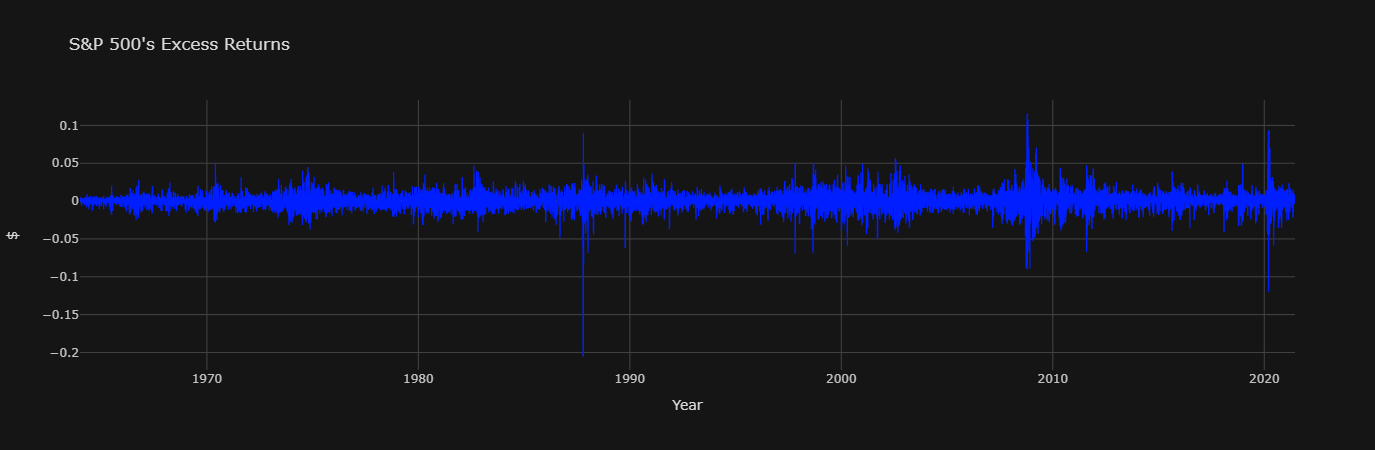

In [32]:
TEST.dropna().iloc[:, 0].iplot(title="S&P 500's Excess Returns",
                               yaxis_title="$", xaxis_title="Year",
                               colors="#001EFF", theme="solar")

# Conclusion <a class="anchor" id="Conclusion"></a>

One may construct a Python Code to simply find the excess returns for any instrument using [Datasream](https://developers.refinitiv.com/eikon-apis/datastream-web-service).
Next, I will write an article making a function that allows users to include Coupon Paying Bonds.

# References <a class="anchor" id="References"></a>

## Finance
- [Corporate Finance Institute - Zero-Coupon Bond](https://corporatefinanceinstitute.com/resources/knowledge/trading-investing/zero-coupon-bond/)

## Tech

You can find more detail regarding the DSWS API and related technologies for this article from the following resources:

- [DSWS page](https://developers.refinitiv.com/eikon-apis/datastream-web-service) on the [Refinitiv Developer Community](https://developers.refinitiv.com/) web site.
- [DSWS API Quick Start Guide page](https://developers.refinitiv.com/eikon-apis/datastream-web-service/quick-start).
- [DSWS Tutorial page](https://developers.refinitiv.com/eikon-apis/datastream-web-service/learning).
- [DSWS API Python Reference Guide](https://developers.refinitiv.com/eikon-apis/datastream-web-service/docs?content=55426&type=documentation_item).

For any question related to this example or Eikon Data API, please use the [Developers Community Q&A Forum](https://community.developers.refinitiv.com/spaces/92/eikon-scripting-apis.html).